In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

import geometry
import model_ToBeFilled as model
import solvers

In [2]:
# Assemble cantilever Geometry
mesh, BCs = geometry.getCantilever()
coordinates, connectivity = mesh['coordinates'], mesh['connectivity']

# Model definition
modelA = model.Model()
modelA.mesh.addNodes(coordinates)
modelA.mesh.addConnectivity(connectivity)

# Define material properties (E, n, yield_stress, Hhardening)
modelA.material.setProperties(210e6, 0.3, 0.24e6, 1e2)
# Define cross-section properties (A)
modelA.section.setProperties(5000)

modelA.setBoundaryConditions(BCs)

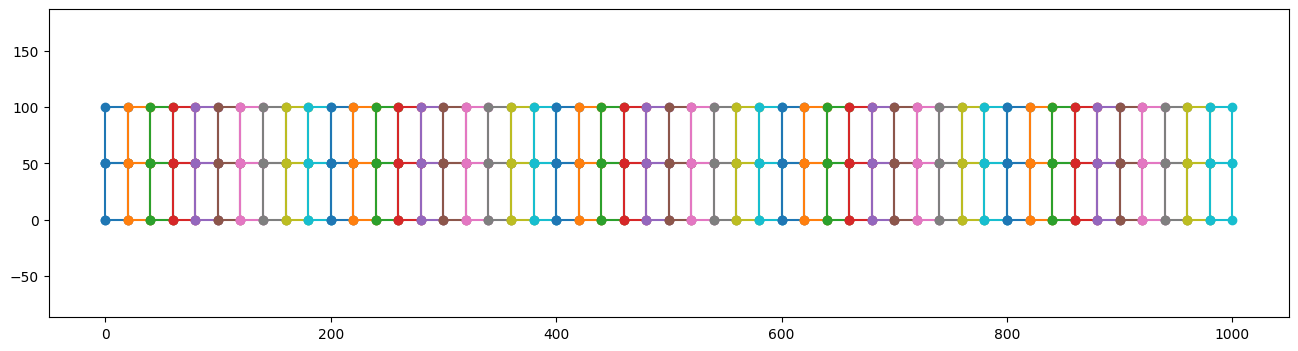

In [3]:
modelA.plotUndeformed(size=(16, 4))

In [4]:
solver = solvers.Static()

solver.setConstraint('Load')
solver.setTolerance(1e-5)
solver.setMaxIterations(50)
solver.setSolutionAttempts(5)

In [5]:
# Load control
u, lambdas = solver.solve(modelA, np.hstack((0.125*np.ones(170), -0.125*np.ones(75))) )


  0%|          | 0/245 [00:00<?, ?it/s]

Step 1
  Attempt 1


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 6)

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(u, lambdas)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

In [ ]:
modelA.plotUndeformed()
modelA.plotDeformed(scale=10, alpha=0.25)